#This notebook has been created for the 2nd dataset (quantitative survey). Reminder about the scope : Deep study about the different potentials factors of the consultant turnover

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


In [15]:
# Load the Excel file
file_path = '/content/survey_answers.xlsx'  # Assuming it's an Excel file based on context
df_second = pd.read_excel(file_path)

# Function to summarize each variable in the Excel dataset
def explore_variable(df):
    summary = []
    for col in df.columns:
        data_type = df[col].dtype
        unique_vals = df[col].nunique()
        missing_vals = df[col].isnull().sum()
        missing_percentage = (missing_vals / len(df)) * 100
        sample_vals = df[col].dropna().unique()[:5]  # Sample of unique values (first 5 for brevity)

        summary.append({
            'Variable': col,
            'Data Type': data_type,
            'Unique Values': unique_vals,
            'Missing Values': missing_vals,
            'Missing %': missing_percentage,
            'Sample Values': sample_vals
        })

    summary_df = pd.DataFrame(summary)
    return summary_df


variable_summary_second = explore_variable(df_second)
print(variable_summary_second)





                           Variable Data Type  Unique Values  Missing Values  \
0                         name_firm    object             17               0   
1                   work_consulting    object              4               0   
2                         job_title    object             11               0   
3                 time_current_firm    object              4               0   
4                    hours_per_week    object              4               0   
5                            gender    object              2               0   
6                               age    object              5               0   
7                         free_time    object              3               0   
8           relation_stress_burnout    object              3               0   
9                 work_life_balance     int64              3               0   
10                   job_fulfilling     int64              4               0   
11                       enjoy_work     

In [16]:
# Print all column names to confirm their exact spelling
print(df_second.columns)


Index(['name_firm', 'work_consulting', 'job_title', 'time_current_firm',
       'hours_per_week', 'gender', 'age', 'free_time',
       'relation_stress_burnout', 'work_life_balance', 'job_fulfilling',
       'enjoy_work', 'fit_value', 'team_firm_fit', 'leadership_satisfaction',
       'recognition_at_work', 'management_proximity',
       'career_development_satisfaction', 'promotion_path_clarity',
       'training_and_development', 'limited_progression',
       'salary_benefits_satisfaction', 'compensation_fairness',
       'financial_inventives', 'retention_factor_1', 'retention_factor_2',
       'retention_factor_3', 'retention_factor_4', 'retention_factor_5',
       'retention_factor_6', 'retention_factor_7'],
      dtype='object')


In [17]:
# Rename columns to the specified variable names
df_second.columns = [
    'name_firm', 'work_consulting', 'job_title', 'time_currently_firm', 'hours_per_week',
    'gender', 'age', 'free_time', 'relation_stress_burnout', 'work_life_balance',
    'job_fulfilling', 'enjoy_work', 'fit_value', 'team_firm_fit', 'leadership_satisfaction',
    'recognition_at_work', 'management_proximity', 'career_development_satisfaction',
    'promotion_path_clarity', 'training_and_development', 'limited_progression',
    'salary_benefits_satisfaction', 'compensation_fairness', 'financial_incentives',
    'retention_factor_1', 'retention_factor_2', 'retention_factor_3', 'retention_factor_4',
    'retention_factor_5', 'retention_factor_6', 'retention_factor_7'
]

# Verify the new column names
print(df_second.columns)


Index(['name_firm', 'work_consulting', 'job_title', 'time_currently_firm',
       'hours_per_week', 'gender', 'age', 'free_time',
       'relation_stress_burnout', 'work_life_balance', 'job_fulfilling',
       'enjoy_work', 'fit_value', 'team_firm_fit', 'leadership_satisfaction',
       'recognition_at_work', 'management_proximity',
       'career_development_satisfaction', 'promotion_path_clarity',
       'training_and_development', 'limited_progression',
       'salary_benefits_satisfaction', 'compensation_fairness',
       'financial_incentives', 'retention_factor_1', 'retention_factor_2',
       'retention_factor_3', 'retention_factor_4', 'retention_factor_5',
       'retention_factor_6', 'retention_factor_7'],
      dtype='object')


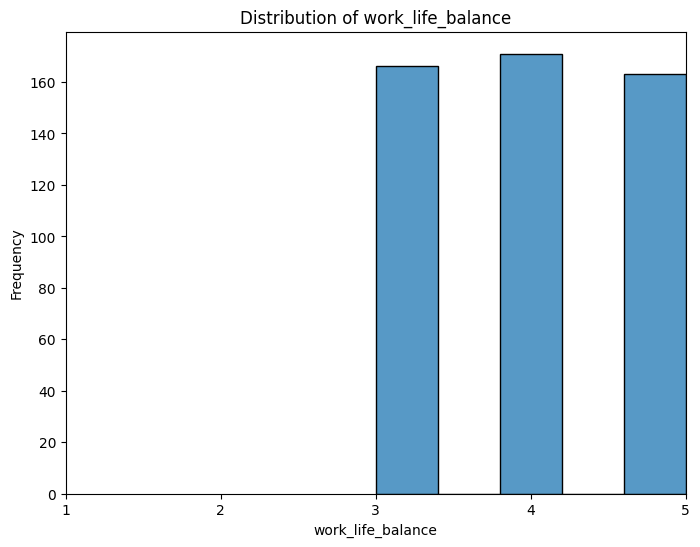

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution with a fixed x-axis scale from 1 to 5 for the "work_life_balance" example
plt.figure(figsize=(8, 6))
sns.histplot(df_second['work_life_balance'], bins=5, kde=False)
plt.title('Distribution of work_life_balance')
plt.xlabel('work_life_balance')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])  # Set x-axis ticks to display only whole numbers from 1 to 5
plt.xlim(1, 5)                # Set the x-axis limit from 1 to 5
plt.show()


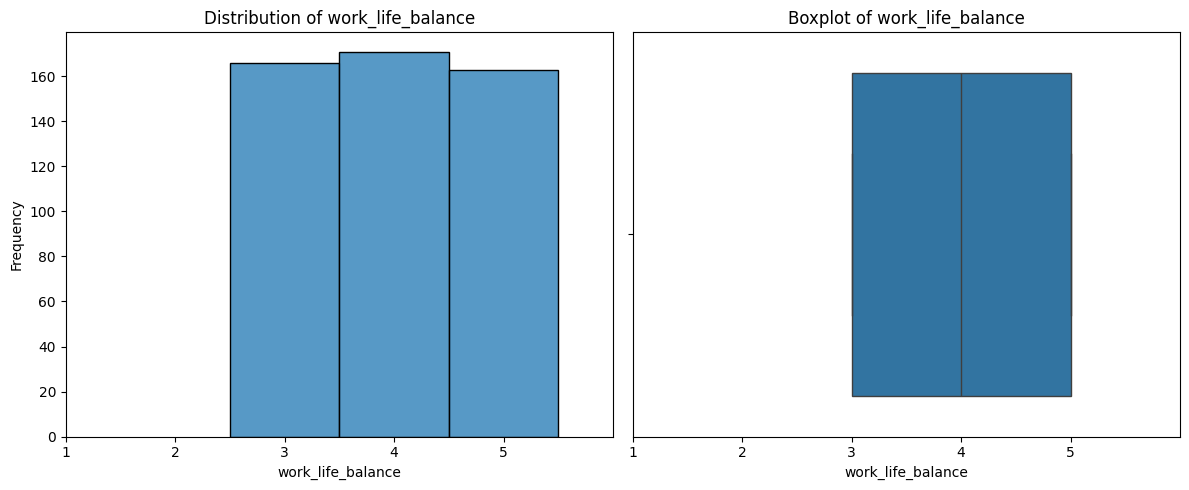

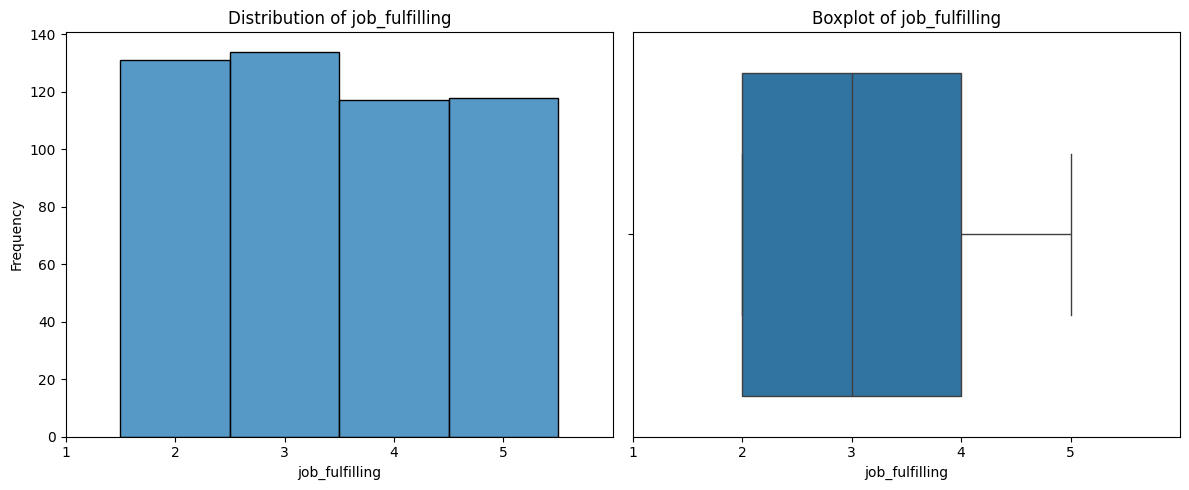

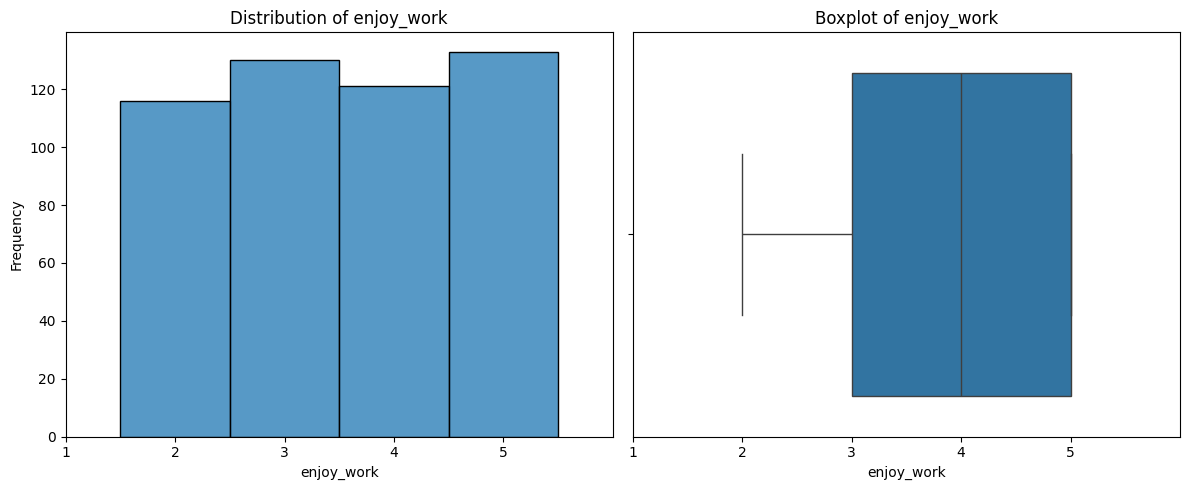

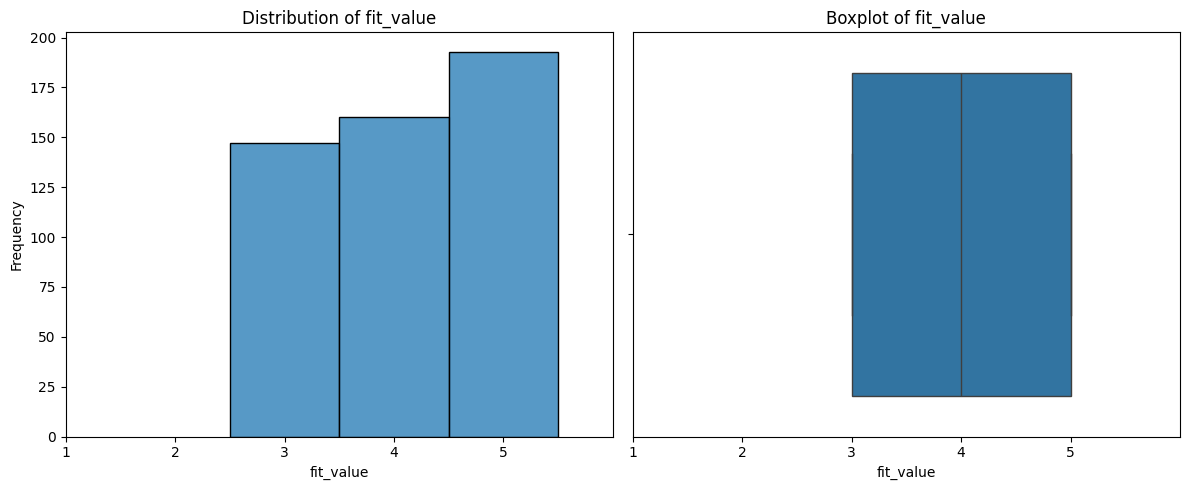

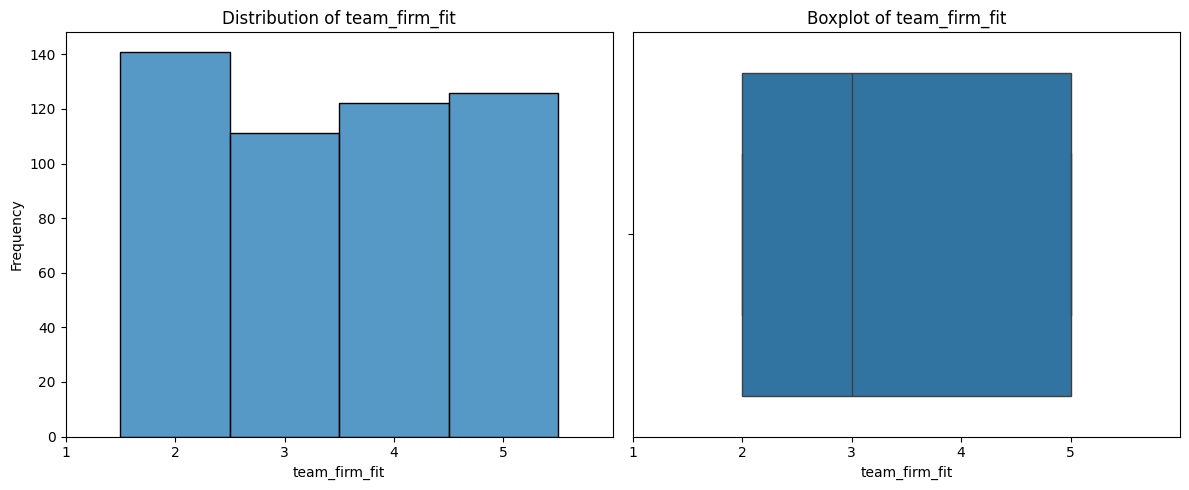

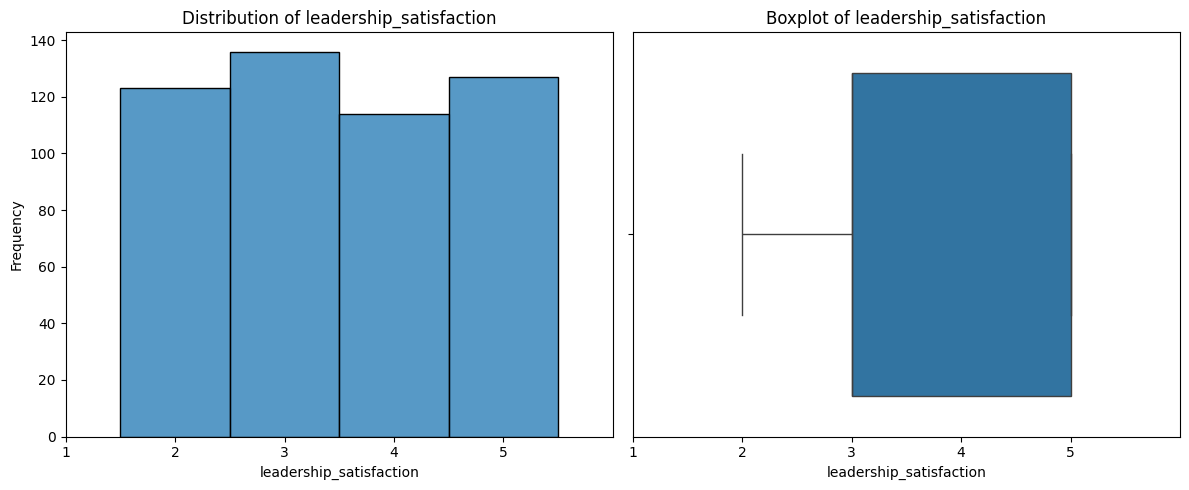

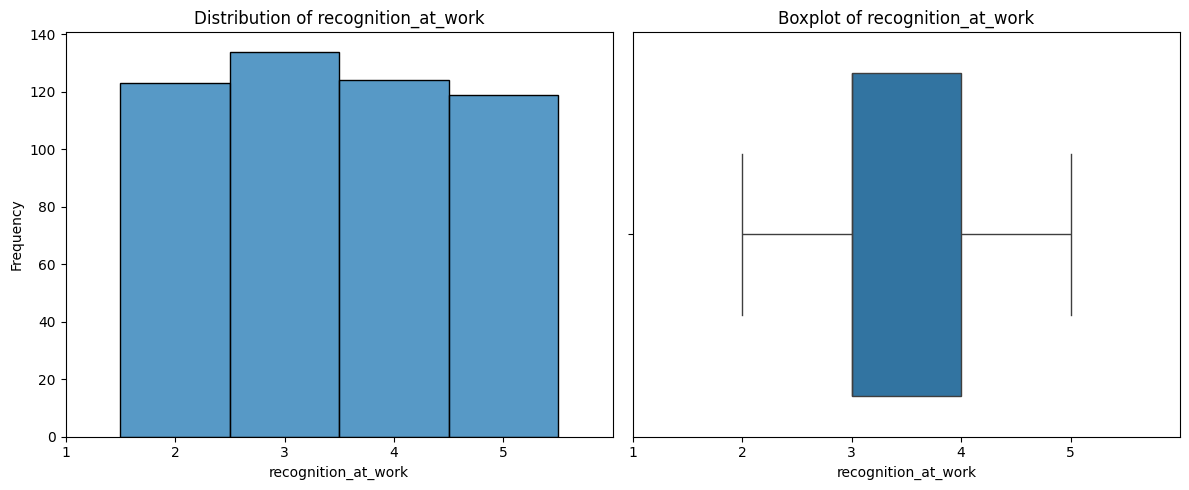

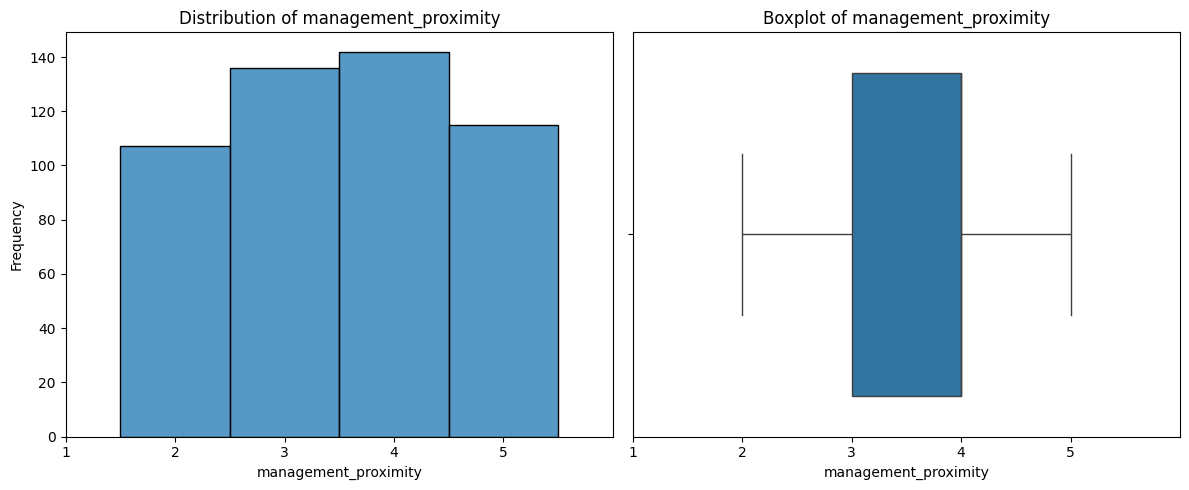

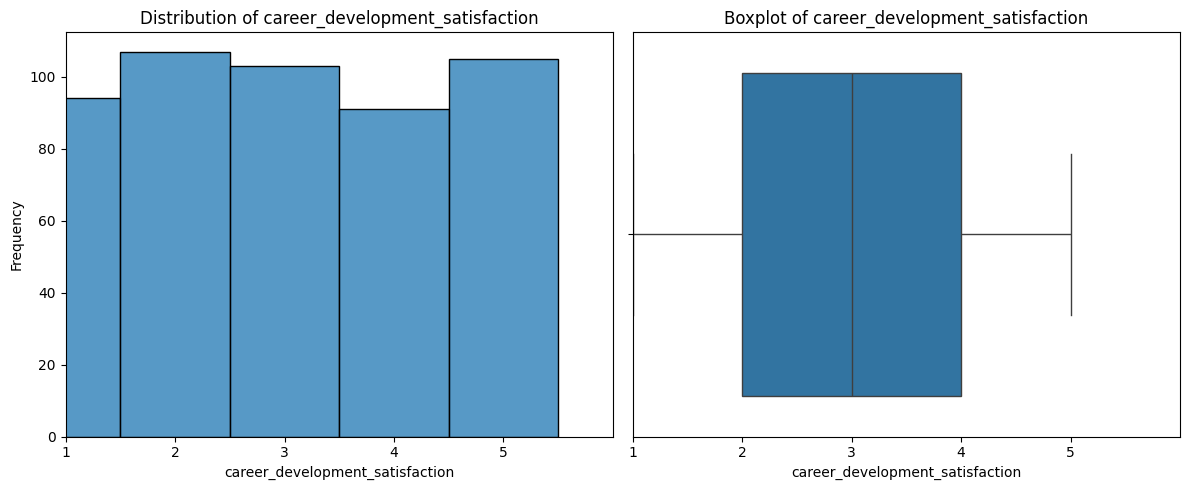

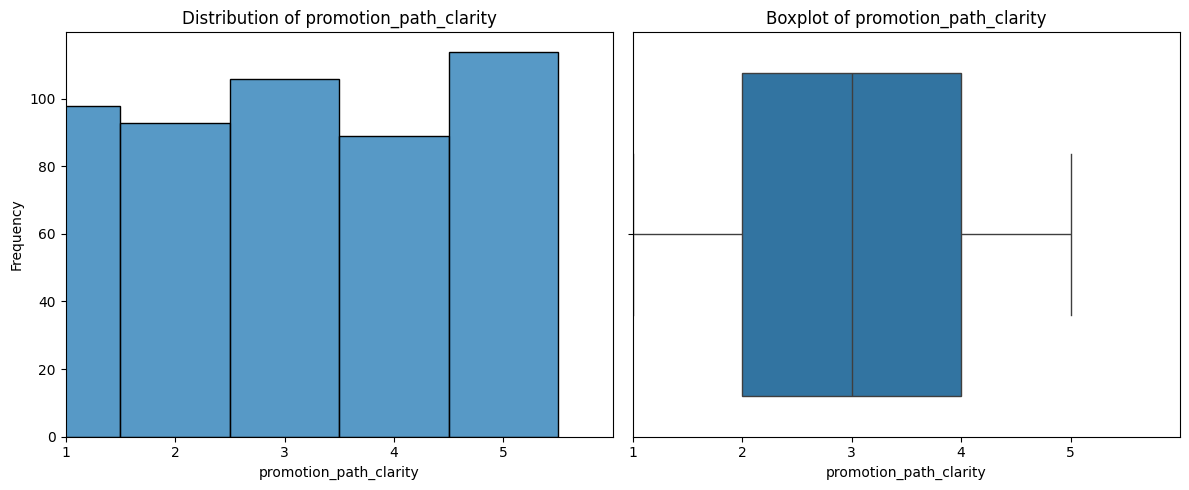

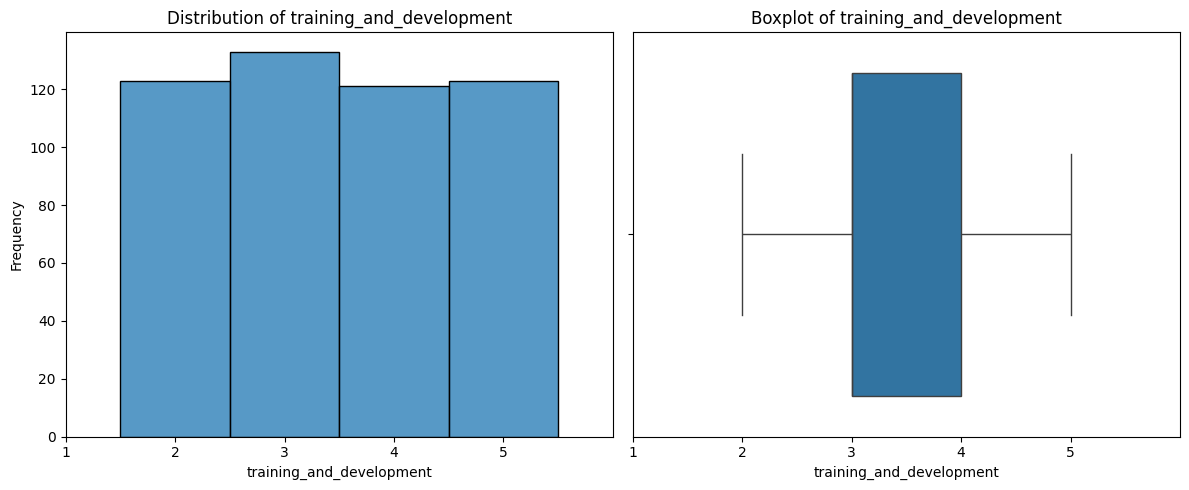

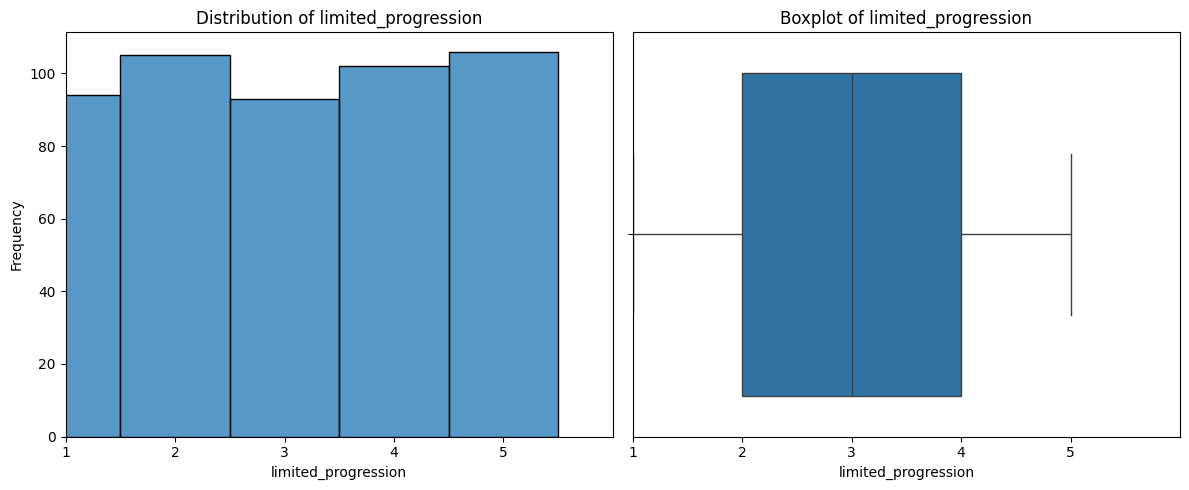

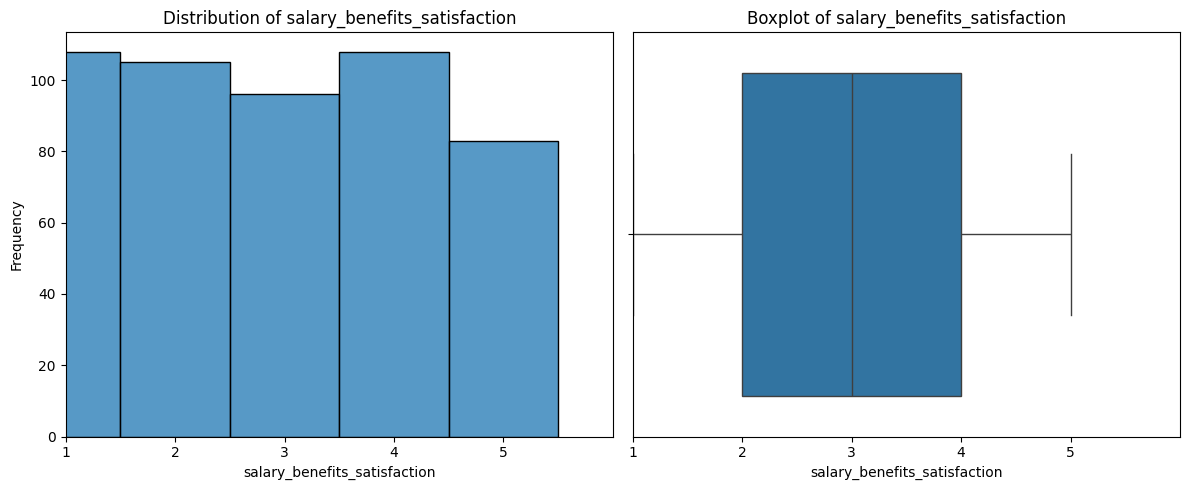

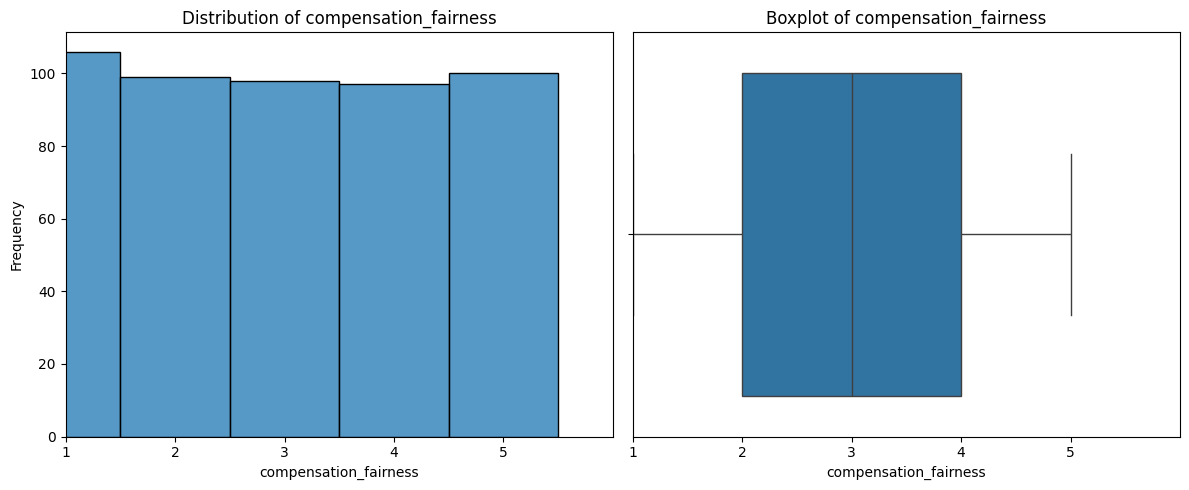

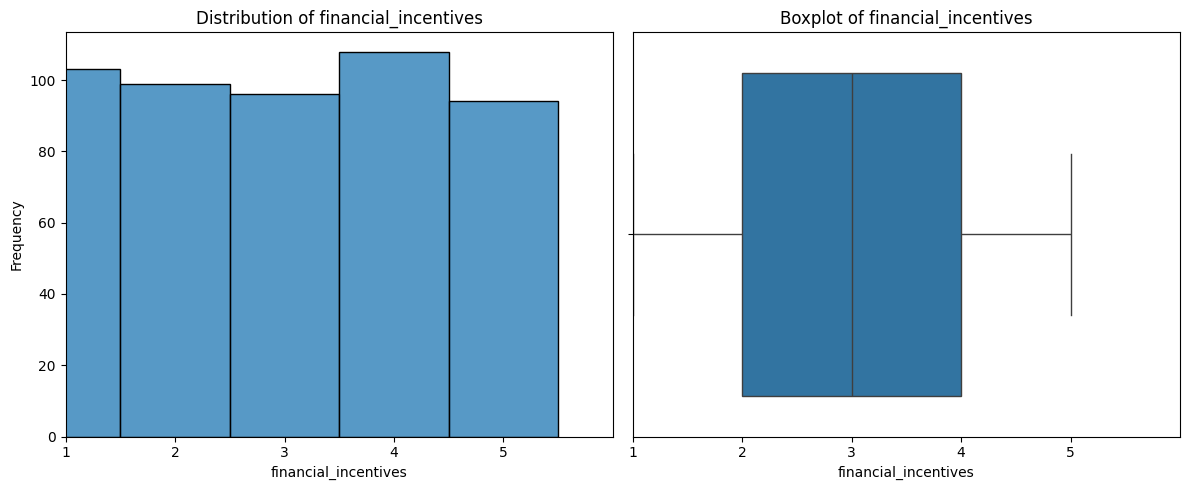

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


satisfaction_metrics = [
    'work_life_balance', 'job_fulfilling', 'enjoy_work', 'fit_value', 'team_firm_fit',
    'leadership_satisfaction', 'recognition_at_work', 'management_proximity',
    'career_development_satisfaction', 'promotion_path_clarity', 'training_and_development',
    'limited_progression', 'salary_benefits_satisfaction', 'compensation_fairness', 'financial_incentives'
]




# Plotting histograms and boxplots for satisfaction and work experience variables with integer-only x-axis
for col in satisfaction_metrics:
    plt.figure(figsize=(12, 5))

    # Histogram with bin width set to 1 to avoid non-integer bins
    plt.subplot(1, 2, 1)
    sns.histplot(df_second[col], binwidth=1, kde=False, discrete=True)  # `discrete=True` ensures integer bins
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks([1, 2, 3, 4, 5])  # Set x-axis ticks to only show whole numbers 1 to 5
    plt.xlim(1, 6)                # Set x-axis limit from 1 to 5

    # Boxplot with x-axis set from 1 to 5
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_second[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks([1, 2, 3, 4, 5])  # Ensure ticks match the 1-5 scale
    plt.xlim(1, 6)

    plt.tight_layout()
    plt.show()


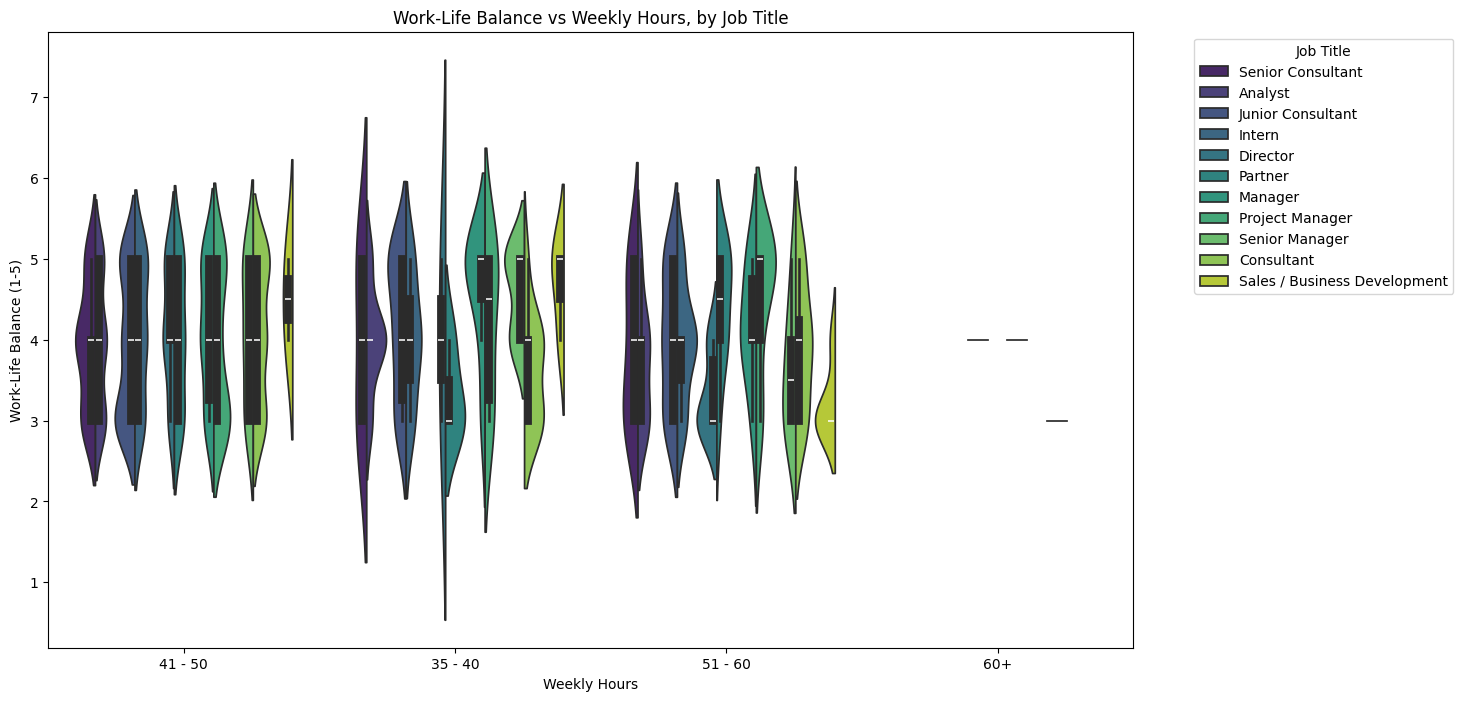

In [37]:
# Violin plot of Work-Life Balance across Weekly Hours, separated by Job Title
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_second, x='hours_per_week', y='work_life_balance', hue='job_title', split=True, palette="viridis")
plt.title("Work-Life Balance vs Weekly Hours, by Job Title")
plt.xlabel("Weekly Hours")
plt.ylabel("Work-Life Balance (1-5)")
plt.legend(title="Job Title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


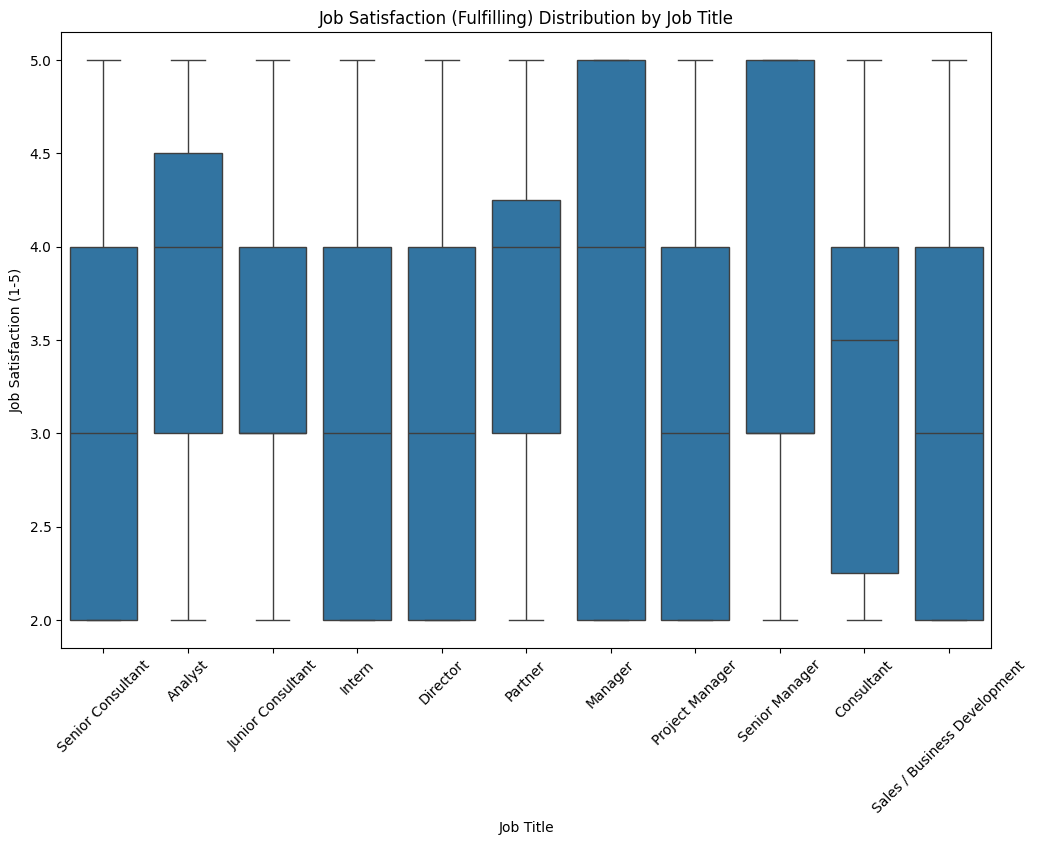

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_second, x='job_title', y='job_fulfilling')
plt.title("Job Satisfaction (Fulfilling) Distribution by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Job Satisfaction (1-5)")
plt.xticks(rotation=45)
plt.show()


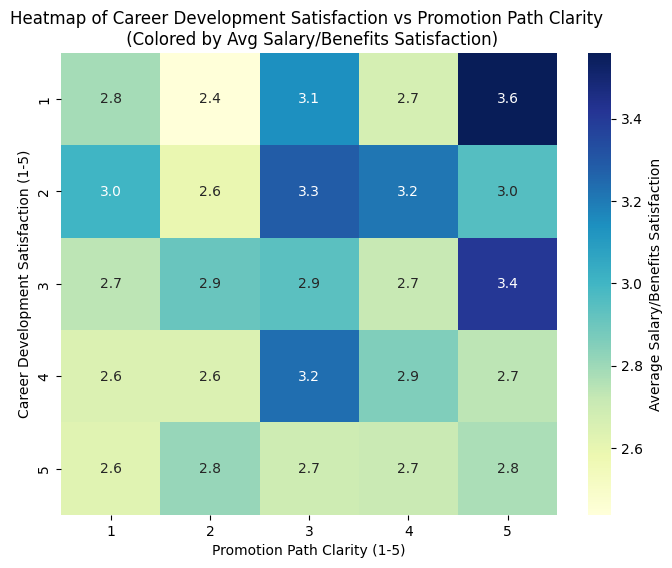

In [24]:


# Pivot the data to get average salary/benefits satisfaction for each combination of career development and promotion path clarity
pivot_table = df_second.pivot_table(
    values='salary_benefits_satisfaction',
    index='career_development_satisfaction',
    columns='promotion_path_clarity',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Salary/Benefits Satisfaction'})
plt.title('Heatmap of Career Development Satisfaction vs Promotion Path Clarity \n (Colored by Avg Salary/Benefits Satisfaction)')
plt.xlabel('Promotion Path Clarity (1-5)')
plt.ylabel('Career Development Satisfaction (1-5)')
plt.show()



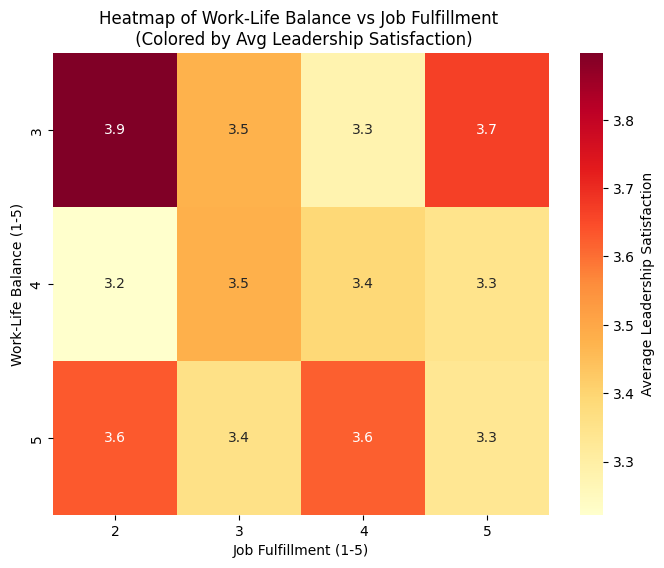

In [26]:
# Heatmap: Work-Life Balance vs Job Fulfillment with Average Leadership Satisfaction
pivot_table_2 = df_second.pivot_table(
    values='leadership_satisfaction',
    index='work_life_balance',
    columns='job_fulfilling',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_2, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Average Leadership Satisfaction'})
plt.title('Heatmap of Work-Life Balance vs Job Fulfillment \n (Colored by Avg Leadership Satisfaction)')
plt.xlabel('Job Fulfillment (1-5)')
plt.ylabel('Work-Life Balance (1-5)')
plt.show()


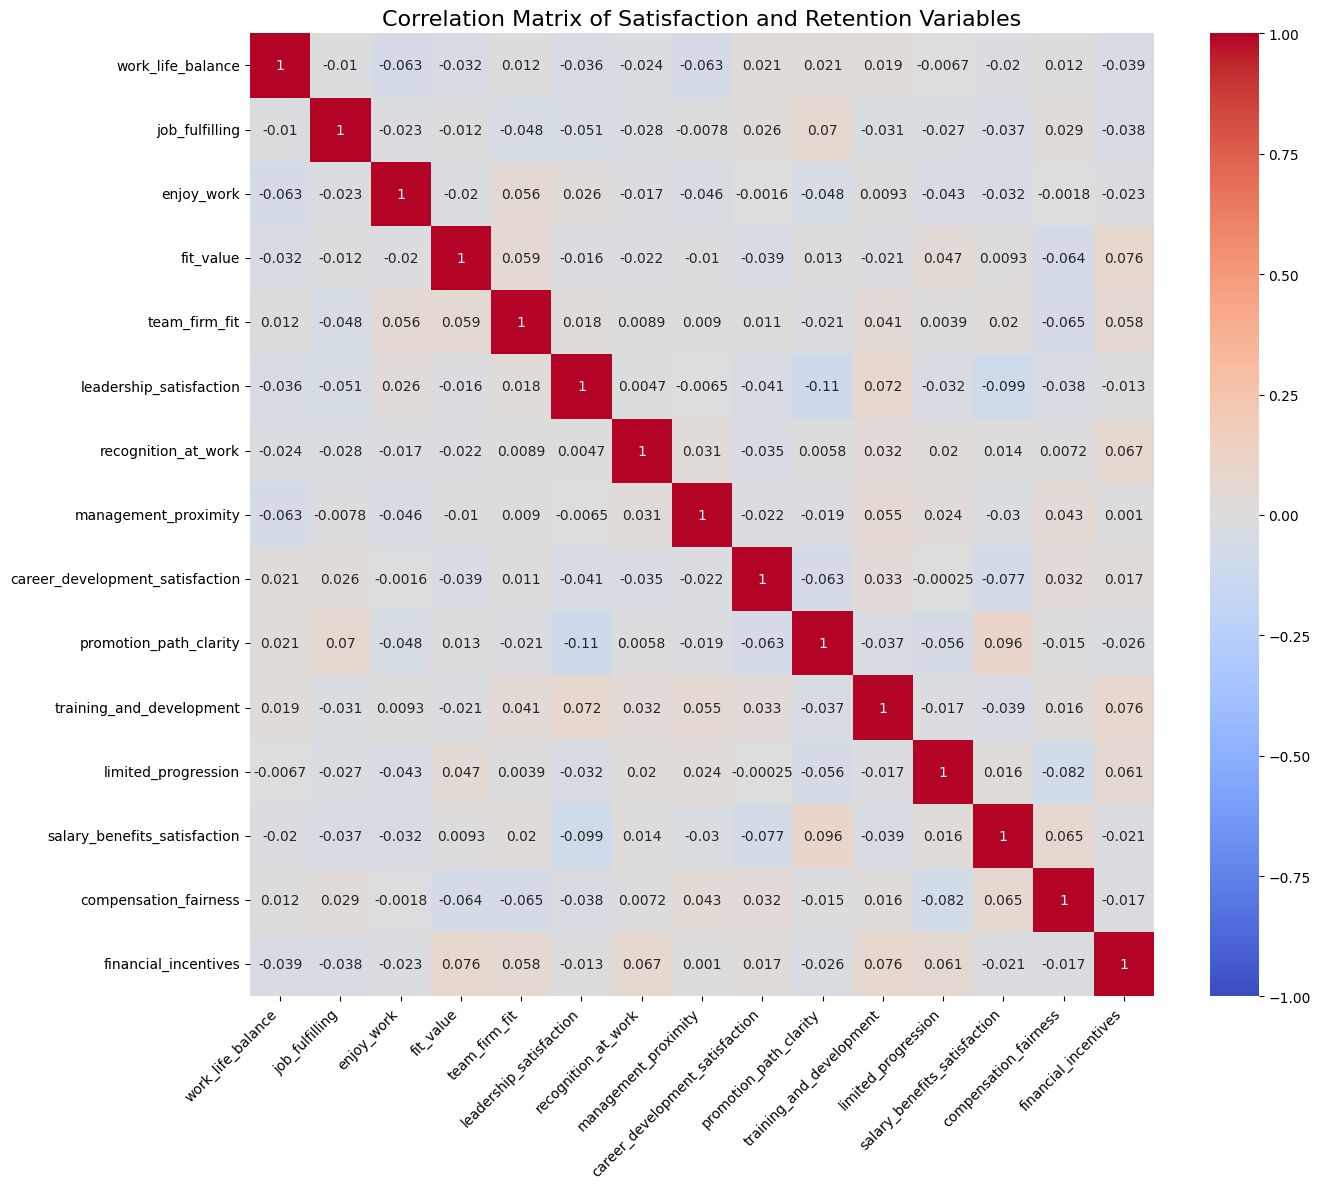

In [27]:
plt.figure(figsize=(14, 12))  # Increase the figure size for better readability
sns.heatmap(
    numeric_satisfaction_data.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot_kws={"size": 10}  # Adjust annotation font size
)
plt.title("Correlation Matrix of Satisfaction and Retention Variables", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
